# Import

In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [25]:
df = gpd.read_file("datasets/combined/lsoa_greenspace.gpkg")

# Define outlier calculation function

In [26]:
def calculate_outliers(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[col][(df[col] <= lower_bound) | (df[col] >= upper_bound)]
    return outliers

# Calculate health outliers

In [27]:
vg_outliers = calculate_outliers(df, "very_good_health")
print(len(vg_outliers))

142


# Plot health outliers

(array([  20.,  193., 1006., 1501.,  972.,  499.,  270.,  132.,   53.,
          13.]),
 array([0.38580931, 0.42330246, 0.4607956 , 0.49828874, 0.53578188,
        0.57327503, 0.61076817, 0.64826131, 0.68575446, 0.7232476 ,
        0.76074074]),
 <BarContainer object of 10 artists>)

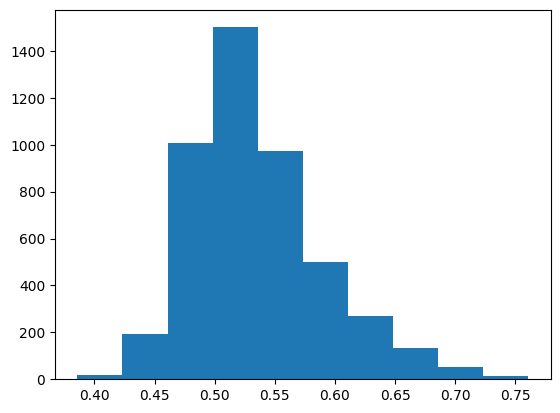

In [29]:
plt.hist(df["very_good_health"])

# Calculate greenspace proportion outliers

In [30]:
gp_outliers = calculate_outliers(df, "greenspace_proportion")
print(len(gp_outliers))

304


# Plot greenspace proportion outliers

(array([2685.,  708.,  404.,  296.,  189.,  138.,  107.,   61.,   50.,
          21.]),
 array([0.        , 0.09156631, 0.18313262, 0.27469893, 0.36626524,
        0.45783155, 0.54939786, 0.64096417, 0.73253048, 0.82409679,
        0.91566309]),
 <BarContainer object of 10 artists>)

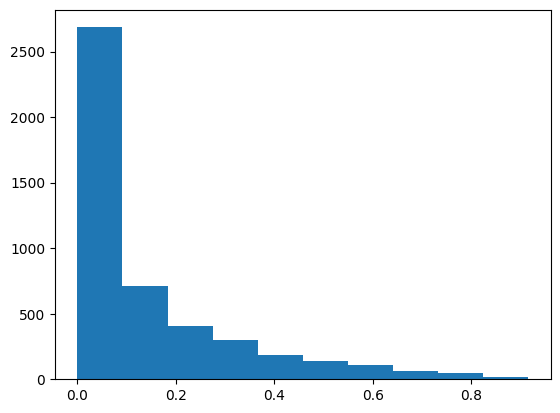

In [31]:
plt.hist(df["greenspace_proportion"])